# CN model run

In [1]:
# Load packages without warnings and messages
suppressPackageStartupMessages({
  library(dplyr)
  library(tidyr)
  library(ggplot2)
  library(patchwork)
  library(cowplot)
  library(visdat)
  library(here)
  library(lubridate)
  library(readr)
  library(naniar)
  library(purrr)
  library(rsofun)
})

In [2]:
# load drivers data
drivers <- readRDS("../data/CH-Oe2_2004-2023_final_ready_for_CNmodel_run_02.rds")
colnames(drivers$forcing[[1]])
# load validation data
cnmodel_validation <- readRDS("../data/cnmodel_validation.rds")
colnames(cnmodel_validation$data[[1]])

[1] "date"   "temp"   "vpd"    "ppfd"   "netrad" "patm"   "snow"   "rain"  
 [9] "tmin"   "tmax"   "vwind"  "fapar"  "co2"    "ccov"   "nee"    "dno3"  
[17] "dnh4"   "fharv"  "cseed"  "nseed"

[1] "date"   "gpp"    "le"     "le_qc"  "nee"    "nee_qc"

In [3]:
# Check the structure and size of the drivers data
str(drivers)
cat("Number of rows in forcing data:", nrow(drivers$forcing[[1]]), "\n")
cat("Date range:", range(drivers$forcing[[1]]$date), "\n")

# Check for any unusual values or missing data
summary(drivers$forcing[[1]])

# Check for any infinite or NaN values
sapply(drivers$forcing[[1]], function(x) sum(is.infinite(x) | is.nan(x)))

tibble [1 x 4] (S3: tbl_df/tbl/data.frame)
 $ sitename   : chr "CH-Oe2"
 $ params_siml:List of 1
  ..$ : tibble [1 x 12] (S3: tbl_df/tbl/data.frame)
  .. ..$ spinup     : logi TRUE
  .. ..$ spinupyears: num 10
  .. ..$ recycle    : num 2
  .. ..$ outdt      : num 1
  .. ..$ ltre       : logi FALSE
  .. ..$ ltne       : logi FALSE
  .. ..$ ltrd       : logi FALSE
  .. ..$ ltnd       : logi FALSE
  .. ..$ lgr3       : logi TRUE
  .. ..$ lgn3       : logi FALSE
  .. ..$ lgr4       : logi FALSE
  .. ..$ c_only     : logi TRUE
 $ site_info  :List of 1
  ..$ : tibble [1 x 6] (S3: tbl_df/tbl/data.frame)
  .. ..$ lon             : num 7.73
  .. ..$ lat             : num 47.3
  .. ..$ elv             : num 450
  .. ..$ whc             : num 223
  .. ..$ canopy_height   : num 0.893
  .. ..$ reference_height: Named num 2.08
  .. .. ..- attr(*, "names")= chr "25%"
 $ forcing    :List of 1
  ..$ : tibble [7,300 x 20] (S3: tbl_df/tbl/data.frame)
  .. ..$ date  : Date[1:7300], format: "2004-01-01" "2

Number of rows in forcing data: 7300 
Date range: 12418 19722 


      date                 temp              vpd               ppfd        
 Min.   :2004-01-01   Min.   :-11.174   Min.   :   0.00   Min.   : 0.6899  
 1st Qu.:2008-12-31   1st Qu.:  4.768   1st Qu.:  75.45   1st Qu.: 9.7401  
 Median :2013-12-31   Median : 11.716   Median : 270.20   Median :21.8373  
 Mean   :2013-12-31   Mean   : 11.479   Mean   : 453.04   Mean   :25.6232  
 3rd Qu.:2018-12-31   3rd Qu.: 17.988   3rd Qu.: 698.65   3rd Qu.:39.9436  
 Max.   :2023-12-31   Max.   : 30.161   Max.   :3053.98   Max.   :67.7960  
     netrad               patm            snow        rain          
 Min.   :-10037.01   Min.   :92729   Min.   :0   Min.   :0.000e+00  
 1st Qu.: -9847.50   1st Qu.:95894   1st Qu.:0   1st Qu.:0.000e+00  
 Median :    21.09   Median :96340   Median :0   Median :1.065e-06  
 Mean   : -2684.77   Mean   :96283   Mean   :0   Mean   :3.587e-05  
 3rd Qu.:    86.65   3rd Qu.:96739   3rd Qu.:0   3rd Qu.:3.722e-05  
 Max.   :   243.88   Max.   :98548   Max.   :0   Max. 

date   temp    vpd   ppfd netrad   patm   snow   rain   tmin   tmax  vwind 
     0      0      0      0      0      0      0      0      0      0      0 
 fapar    co2   ccov    nee   dno3   dnh4  fharv  cseed  nseed 
     0      0      0      0      0      0      0      0      0

In [4]:
str(drivers$forcing[[1]])

tibble [7,300 x 20] (S3: tbl_df/tbl/data.frame)
 $ date  : Date[1:7300], format: "2004-01-01" "2004-01-02" ...
 $ temp  : num [1:7300] -0.227 -0.499 -2.956 -4.209 -1.192 ...
 $ vpd   : num [1:7300] 6.51 0 7.09 76 23.93 ...
 $ ppfd  : num [1:7300] 6.51 7.12 7.13 9.54 6.73 ...
 $ netrad: num [1:7300] 1.34 -4.38 -4.58 -9.02 -6.91 ...
 $ patm  : num [1:7300] 95825 95455 96232 96367 96710 ...
 $ snow  : num [1:7300] 0 0 0 0 0 0 0 0 0 0 ...
 $ rain  : num [1:7300] 1.85e-05 5.79e-06 0.00 0.00 0.00 ...
 $ tmin  : num [1:7300] -1.23 -2.06 -5.82 -10.45 -8.1 ...
 $ tmax  : num [1:7300] -0.01 -0.05 -2.19 -1.48 0.53 0.35 4.14 1 6.48 7.47 ...
 $ vwind : num [1:7300] 1.52 2.022 2.716 1.089 0.675 ...
 $ fapar : num [1:7300] 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.23 0.23 ...
 $ co2   : num [1:7300] 385 378 386 402 437 ...
 $ ccov  : num [1:7300] 1 0.937 1 0.776 0.87 ...
 $ nee   : num [1:7300] 0.761 0.788 0.769 0.764 0.754 ...
 $ dno3  : num [1:7300] 0 0 0 0 0 0 0 0 0 0 ...
 $ dnh4  : num [1:7300] 3

In [5]:
# Check date range and completeness of forcing data
forcing_data <- drivers$forcing[[1]]
date_range <- range(forcing_data$date)
cat("Date range:", as.character(date_range[1]), "to", as.character(date_range[2]), "\n")

# Check if years are complete
years_in_data <- year(forcing_data$date)
unique_years <- unique(years_in_data)
cat("Years in data:", paste(unique_years, collapse = ", "), "\n")

# Check completeness of each year
year_completeness <- forcing_data %>%
  mutate(year = year(date)) %>%
  group_by(year) %>%
  summarise(
    n_days = n(),
    start_date = min(date),
    end_date = max(date),
    is_leap = leap_year(year[1]),
    expected_days = ifelse(is_leap, 366, 365),
    complete = n_days == expected_days,
    .groups = 'drop'
  )

print(year_completeness)

# Identify incomplete years
incomplete_years <- year_completeness$year[!year_completeness$complete]
if(length(incomplete_years) > 0) {
  cat("Incomplete years found:", paste(incomplete_years, collapse = ", "), "\n")
} else {
  cat("All years are complete\n")
}

Date range: 2004-01-01 to 2023-12-31 


Years in data: 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023 
# A tibble: 20 x 7
    year n_days start_date end_date   is_leap expected_days complete
   <dbl>  <int> <date>     <date>     <lgl>           <dbl> <lgl>   
 1  2004    365 2004-01-01 2004-12-31 TRUE              366 FALSE   
 2  2005    365 2005-01-01 2005-12-31 FALSE             365 TRUE    
 3  2006    365 2006-01-01 2006-12-31 FALSE             365 TRUE    
 4  2007    365 2007-01-01 2007-12-31 FALSE             365 TRUE    
 5  2008    365 2008-01-01 2008-12-31 TRUE              366 FALSE   
 6  2009    365 2009-01-01 2009-12-31 FALSE             365 TRUE    
 7  2010    365 2010-01-01 2010-12-31 FALSE             365 TRUE    
 8  2011    365 2011-01-01 2011-12-31 FALSE             365 TRUE    
 9  2012    365 2012-01-01 2012-12-31 TRUE              366 FALSE   
10  2013    365 2013-01-01 2013-12-31 FALSE             365 TRUE    
11  2014    365 20

# Error handling for leap year data
- The model was giving errors when it was run with leap year data, so we are removing the leap year data from the forcing data.
- This is done by removing the rows where date contains "-02-29".

In [6]:
# # check the data patterns in the forcing data
# vis_dat(drivers$forcing[[1]], warn_large_data = TRUE)

# # Plot all columns in the forcing data with different colors
# plot_forcing <- drivers$forcing[[1]] %>%
#     select(date, everything()) %>%
#     pivot_longer(cols = -date, names_to = "variable", values_to = "value") %>%
#     ggplot(aes(x = date, y = value, color = variable)) +
#     # highlight the area from 2021 to 2023
#     geom_rect(aes(xmin = as.Date("2021-01-01"), xmax = as.Date("2023-12-31"), ymin = -Inf, ymax = Inf), 
#               fill = "#bde2ef", alpha = 0.2) +
#     geom_line(linewidth = 0.3) +
#     facet_wrap(~variable, scales = "free_y", ncol = 3) +
#     scale_x_date(date_labels = "%Y", date_breaks = "1 years") +
#     scale_color_viridis_d() +  # Use viridis color palette for different colors
#     labs(title = "Forcing Data Variables Over Time",
#          x = "Year",
#          y = "Value") +
#     theme_bw() +
#     theme(axis.text.x = element_text(angle = 45, hjust = 1),
#           strip.text = element_text(size = 8),
#           panel.grid.minor = element_blank(),
#           legend.position = "none")  # Hide legend since colors are redundant with facets

# # Save the plot
# ggsave("../data/forcing_data_variables.png", plot_forcing, width = 20, height = 10, dpi = 300, bg = "white")
# plot_forcing

In [7]:
# # Check for missing values in the drivers object in forcing data
# ### check for missing values in the data----------------
# miss_plot <- drivers |>
#   select(sitename, forcing) |>
#   unnest(forcing) |>
#   vis_miss(warn_large_data = FALSE)

# ggsave("../data/01_vis_miss_drivers.png", miss_plot, width = 10, height = 6)
# miss_plot

In [8]:
# Define model parameters taken from p model script and other scripts
pars <- list(
  # Paramteres taken from P-model
  kphio = 0.045,             # setup ORG in Stocker et al. 2020 GMD  #typical ranges: 0.04-0.1 #lma / fapar / gpp / leaf c / cturnover / Vcmax 
  kphio_par_a = 0.0,        # set to zero to disable temperature-dependence of kphio
  kphio_par_b = 1.0,
  soilm_thetastar = 0.6 * 240,  # to recover old setup with soil moisture stress
  soilm_betao = 0.0,
  beta_unitcostratio = 146.0,
  rd_to_vcmax = 0.014,      # value from Atkin et al. 2015 for C3 herbaceous # cturnover / Vcmax
  tau_acclim = 30.0,
  kc_jmax = 0.41,
  
  # Plant
  f_nretain = 0.500000, #0.5 # cturnover
  fpc_tree_max = 0.8000000, #typical range: 0.8-0.95. #fapar / c leaf
  growtheff = 0.6000000, #0.45  #typical range: 0.3-0.7 #lma / c leaf / cturnover
  r_root = 2*0.913000,
  r_sapw = 2*0.044000,
  exurate = 0.003000,
  
  k_decay_leaf = 1.90000, #1.90000, #typical range: 0.5 - 2.0 # cleaf / cturnover
  k_decay_root = 1.90000, # cturnover
  k_decay_labl = 1.90000, #1.90000, #typical range: 0.5 - 2.0 # cleaf / cturnover
  k_decay_sapw = 1.90000, # cturnover
  
  r_cton_root = 37.0000, # cturnover
  r_cton_wood = 100.000, # cturnover
  r_cton_seed = 15.0000, # cturnover
  nv_vcmax25 = 5000, #0.02 * 13681.77, # see ln_cn_review/vignettes/analysis_leafn_vcmax_field.Rmd, l.695; previously: 5000.0, #lma / Vcmax
  ncw_min = 0.056, #0.08 * 1.116222, # see ln_cn_review/vignettes/analysis_leafn_vcmax_field.Rmd, l.691; previously used: 0.056, #lma
  r_n_cw_v = 0.05, #0.1, # assumed that LMA is independent of Vcmax25; previously: 0.1, #lma /Vcmax #typical range: 0.05-0.2 
  r_ctostructn_leaf = 30.0000, #1.3 * 45.84125, # see ln_cn_review/vignettes/analysis_leafn_vcmax_field.Rmd, l.699; previously used: 80.0000, #typical range: 40-80 #lma / fapar / cleaf 
  kbeer = 0.350000, #0.400000 #fapar #typical range: 0.3-0.8
  
  # Phenology (should be PFT-specific)
  gddbase = 5.0, #typical range: 5-10 #c leaf 
  ramp = 0.0,
  phentype = 2.0,
  
  # Soil physics (should be derived from params_soil, fsand, fclay, forg, fgravel)
  perc_k1 = 5.0,
  thdiff_wp = 0.2,
  thdiff_whc15 = 0.8,
  thdiff_fc = 0.4,
  forg = 0.01,
  wbwp = 0.029,
  por = 0.421,
  fsand = 0.82,
  fclay = 0.06,
  fsilt = 0.12,
  
  # Water and energy balance
  kA = 107,
  kalb_sw = 0.17,
  kalb_vis = 0.03,
  kb = 0.20,
  kc = 0.25,
  kCw = 1.05,
  kd = 0.50,
  ke = 0.0167,
  keps = 23.44,
  kWm = 220.0,
  kw = 0.26,
  komega = 283.0,
  maxmeltrate = 3.0,
  
  # Soil BGC
  klitt_af10 = 1.2,
  klitt_as10 = 0.35,
  klitt_bg10 = 0.35,
  kexu10 = 50.0,
  ksoil_fs10 = 0.021,
  ksoil_sl10 = 7.0e-04,
  ntoc_crit1 = 0.45,
  ntoc_crit2 = 0.76,
  cton_microb = 10.0,
  cton_soil = 9.77,
  fastfrac = 0.985,
  
  # N uptake
  eff_nup = 0.0001000,
  minimumcostfix = 1.000000,
  fixoptimum = 25.15000,
  a_param_fix = -3.62000,
  b_param_fix = 0.270000,
  
  # Inorganic N transformations (re-interpreted for simple ntransform model)
  maxnitr =  0.00005,
  
  # Inorganic N transformations for full ntransform model (not used in simple model)
  non = 0.01,
  n2on = 0.0005,
  kn = 83.0,
  kdoc = 17.0,
  docmax = 1.0,
  dnitr2n2o = 0.01,
  
  # Additional parameters - previously forgotten
  frac_leaf = 0.4,         # after wood allocation  #typical range: 0.4-0.8 #lma / fapar / c leaf / cturnover
  frac_wood = 0,           # highest priority in allocation  #typical range: 0-0.6 #lma / cleaf 
  frac_avl_labl = 0.1, #0.1   #typical range: 0.1-0.3 # c leaf 
  
  # for development
  tmppar = 9999,
  
  # simple N uptake module parameters
  nuptake_kc = 600,
  nuptake_kv = 5,
  nuptake_vmax = 0.3 #0.3 #typical range: 0.1-0.3 # cleaf / cturnover
)

# make dir
if (!dir.exists("../output")) {
  dir.create("../output")
}
# Function to run the model and save the output
cnmodel_run_save <- function(drivers, pars, save_path, file_basename) {
  output_04_23 <- runread_cnmodel_f(drivers = drivers, 
                                    par = pars,
                                    ncores = 12,
                                    makecheck = FALSE,  # Set to FALSE to avoid strict checks
                                    parallel = TRUE
  )
  rds_filename <- paste0(file_basename, ".rds")
  if (!dir.exists(save_path)) {
    stop("Directory does not exist: ", save_path)
  }
  saveRDS(output_04_23, file = file.path(save_path, rds_filename))
  message("Model output saved: ", file.path(save_path, rds_filename))
  invisible(output_04_23)
}
# Example usage:
# Run the model with filtered data (complete years only)
cnmodel_run_save(drivers, pars, "../output", "output_04_23")
# Read the output
output_04_23 <- readRDS("../output/output_04_23.rds")

Using partial cluster of size 1

Model output saved: ../output/output_04_23.rds



# Plot output results

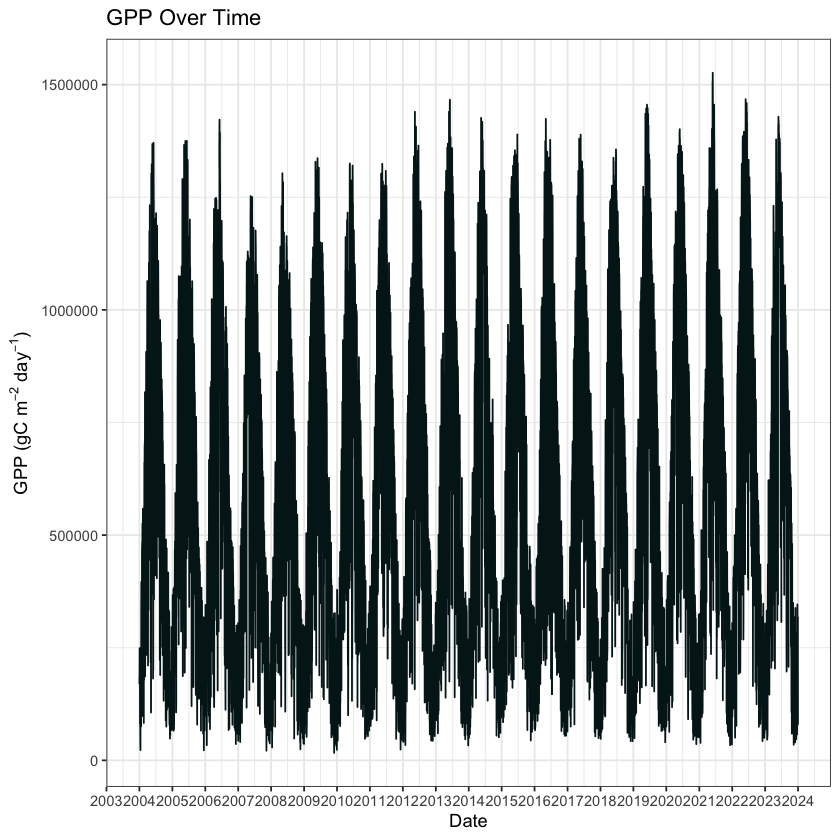

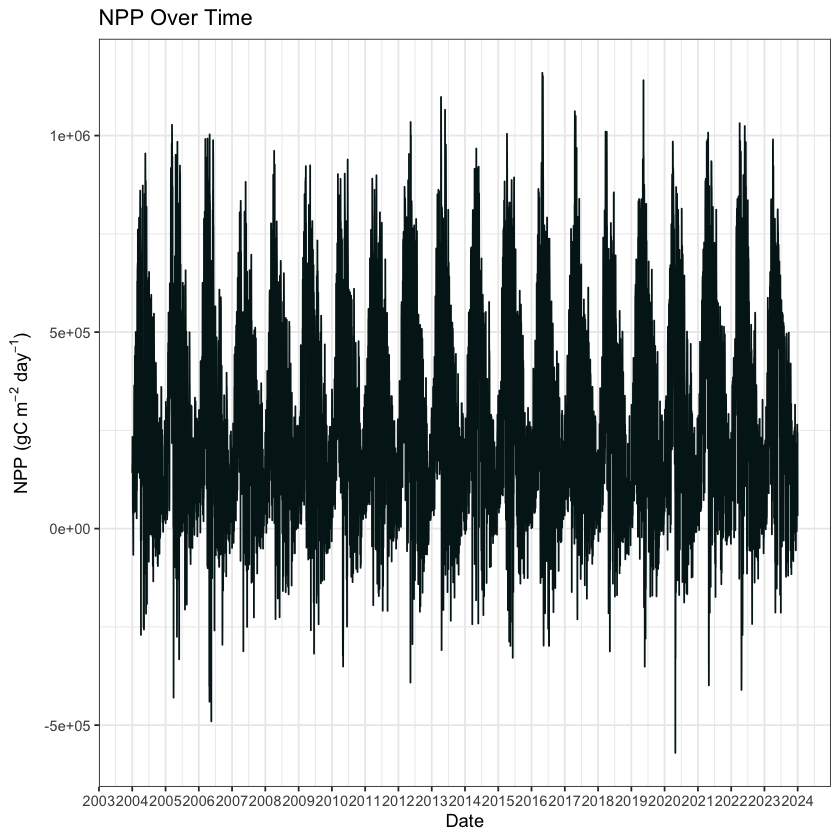

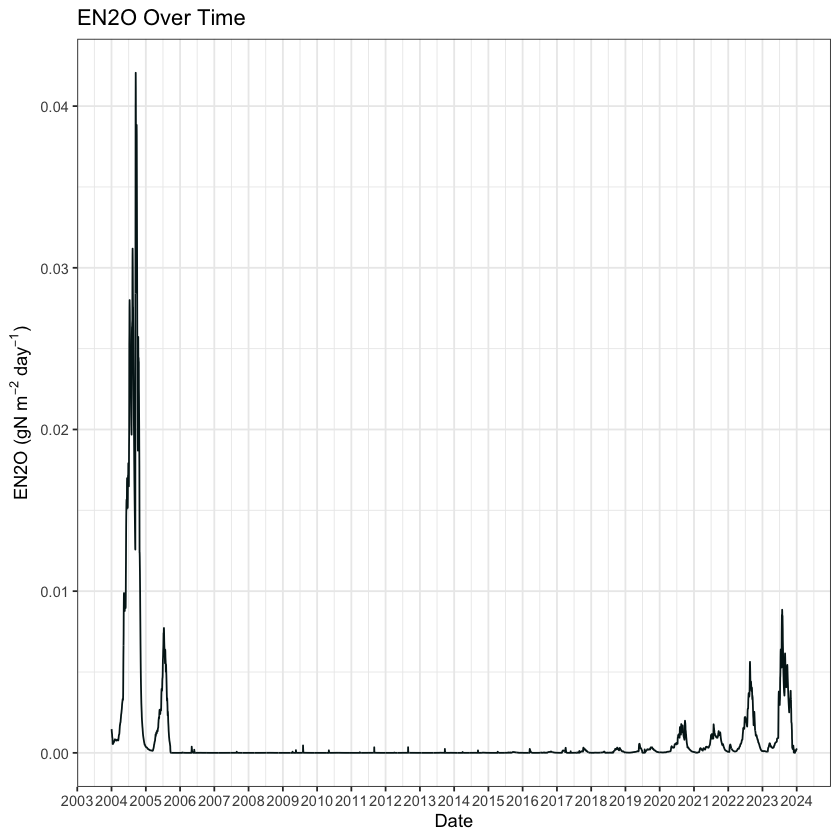

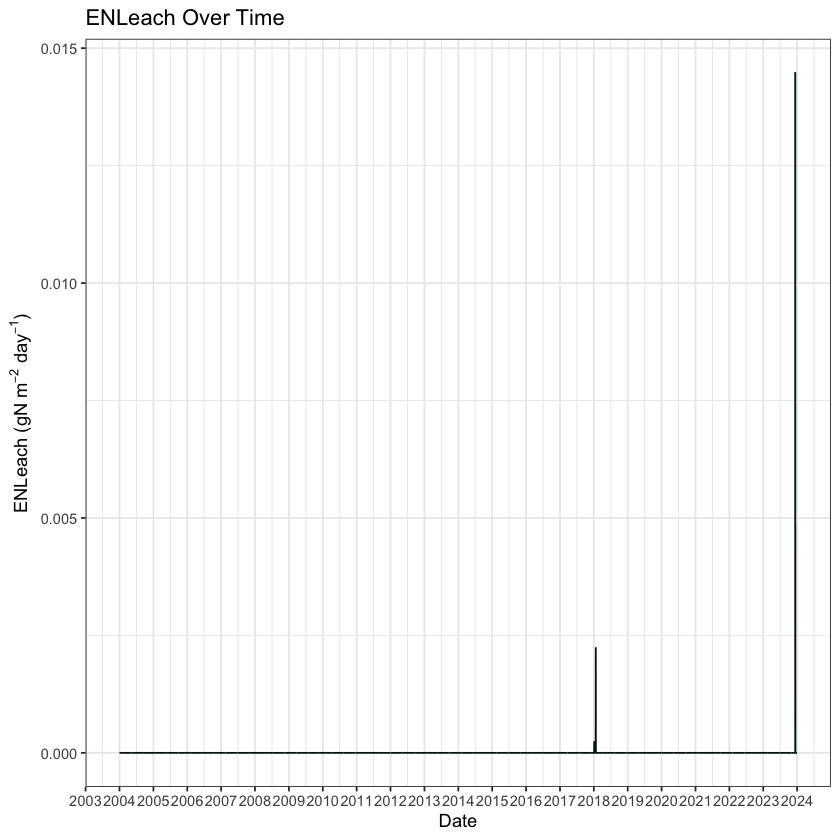

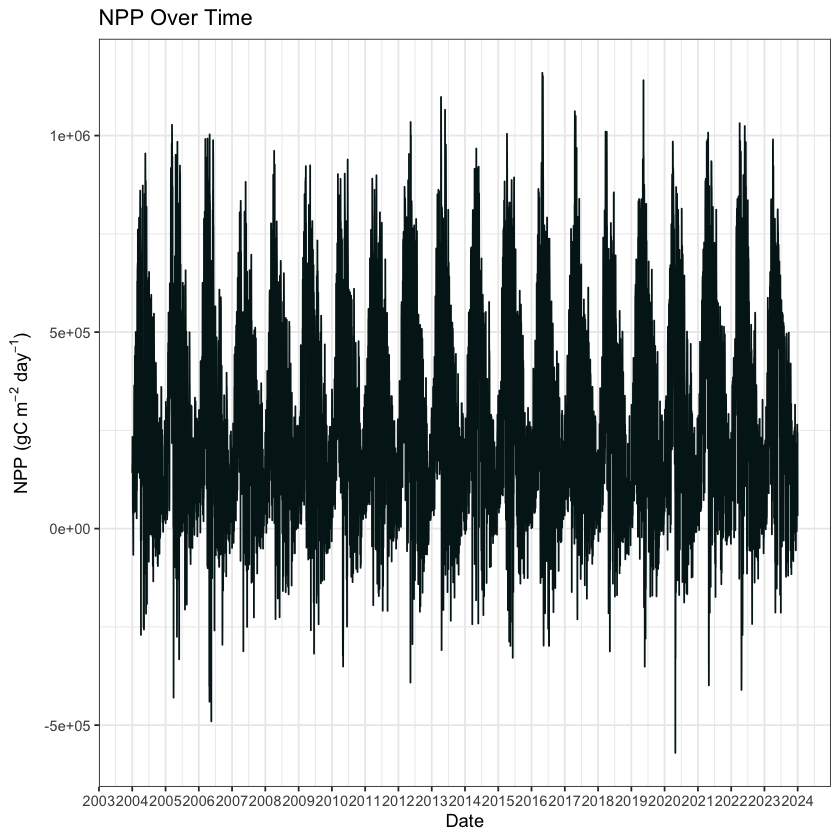

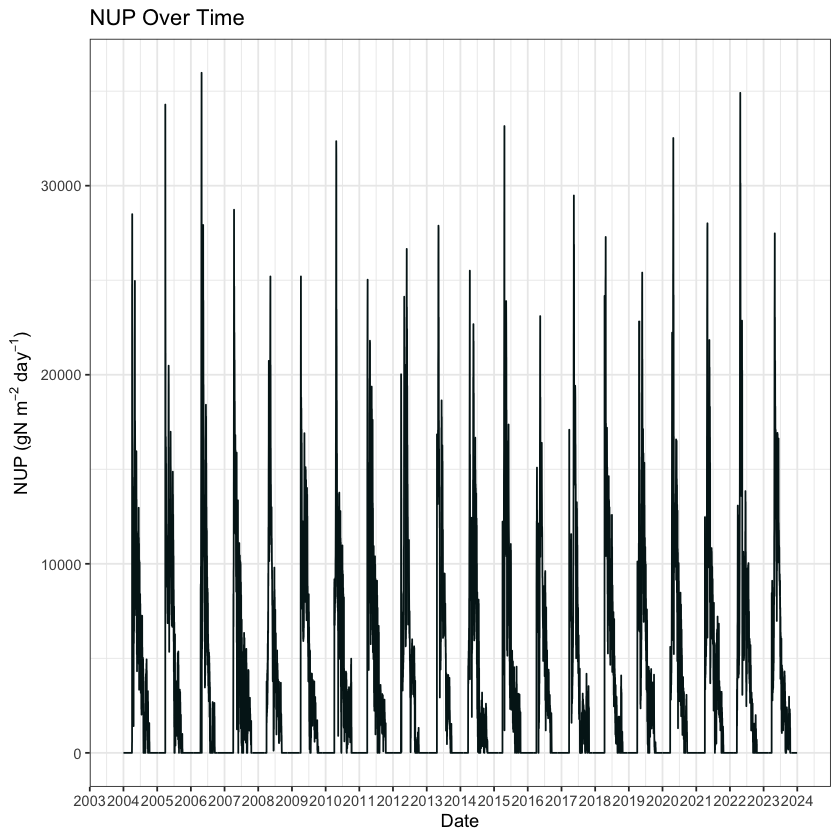

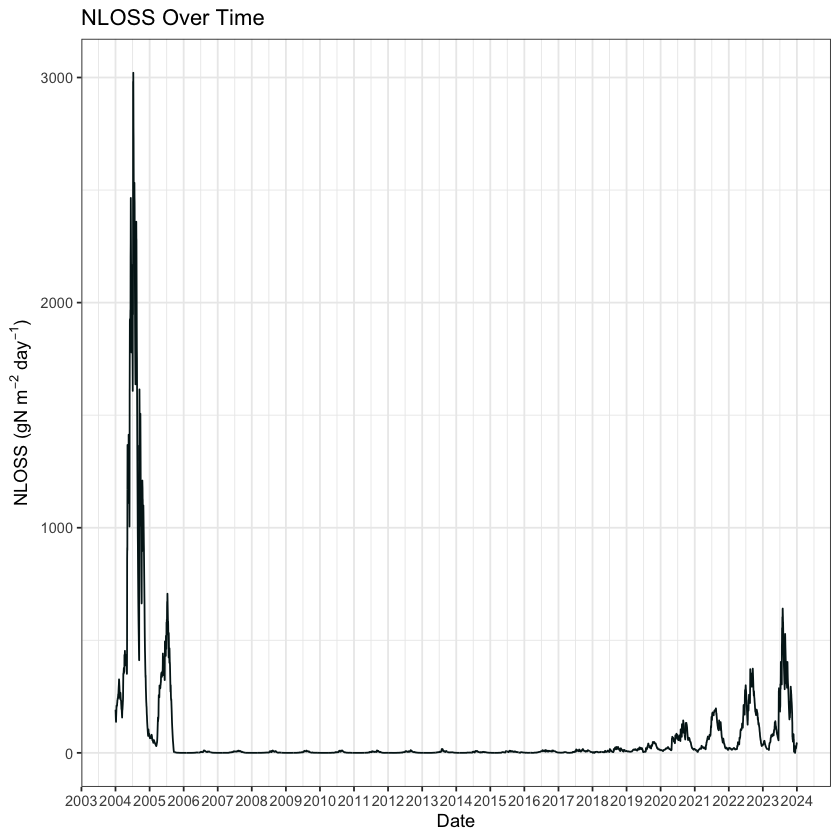

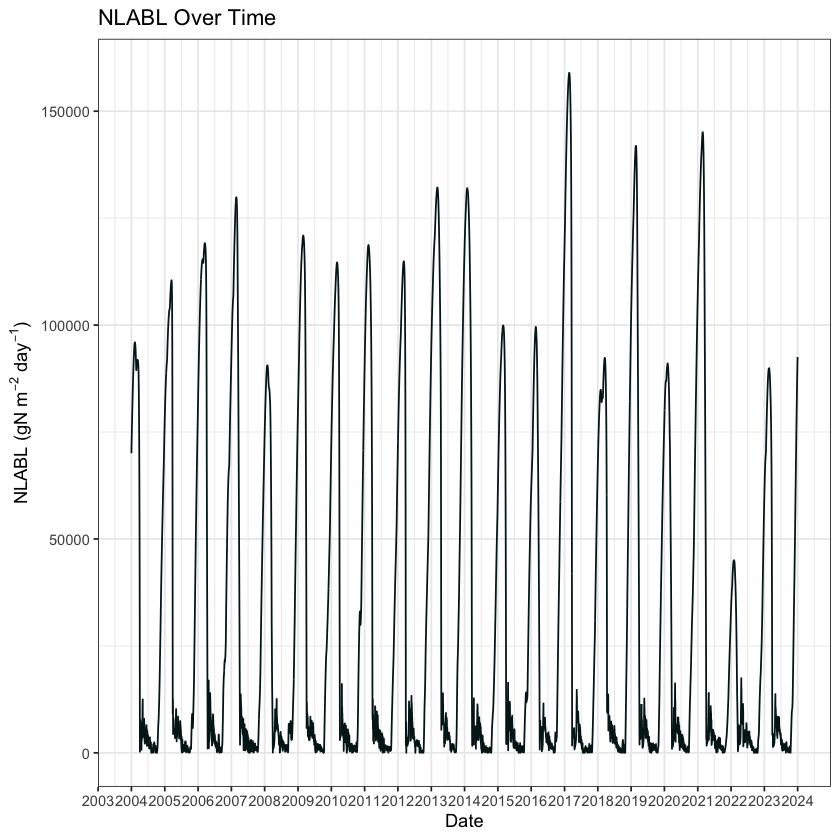

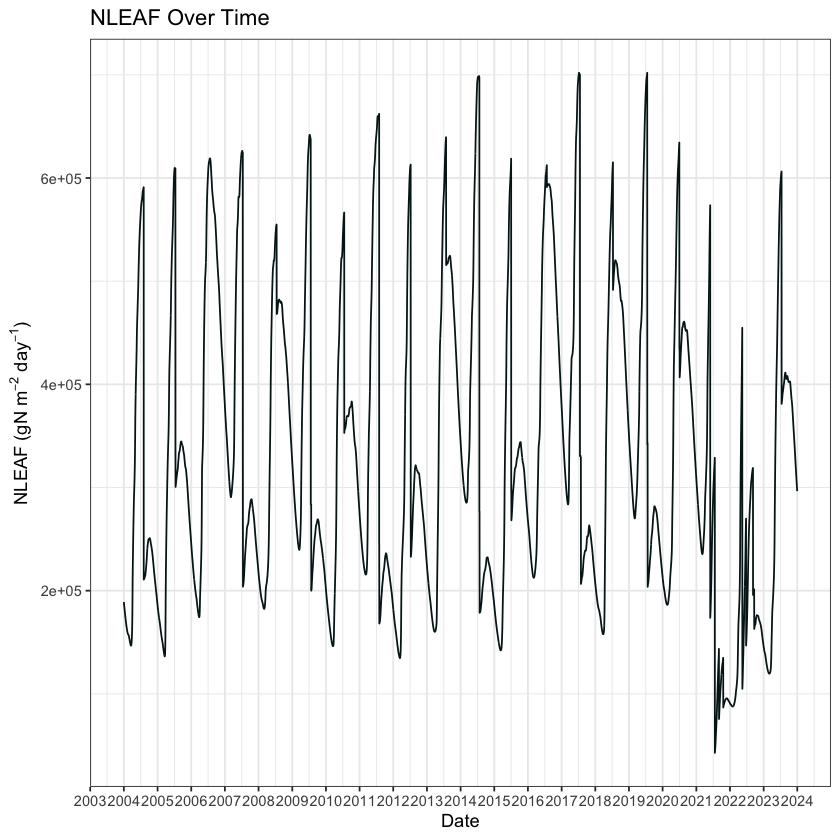

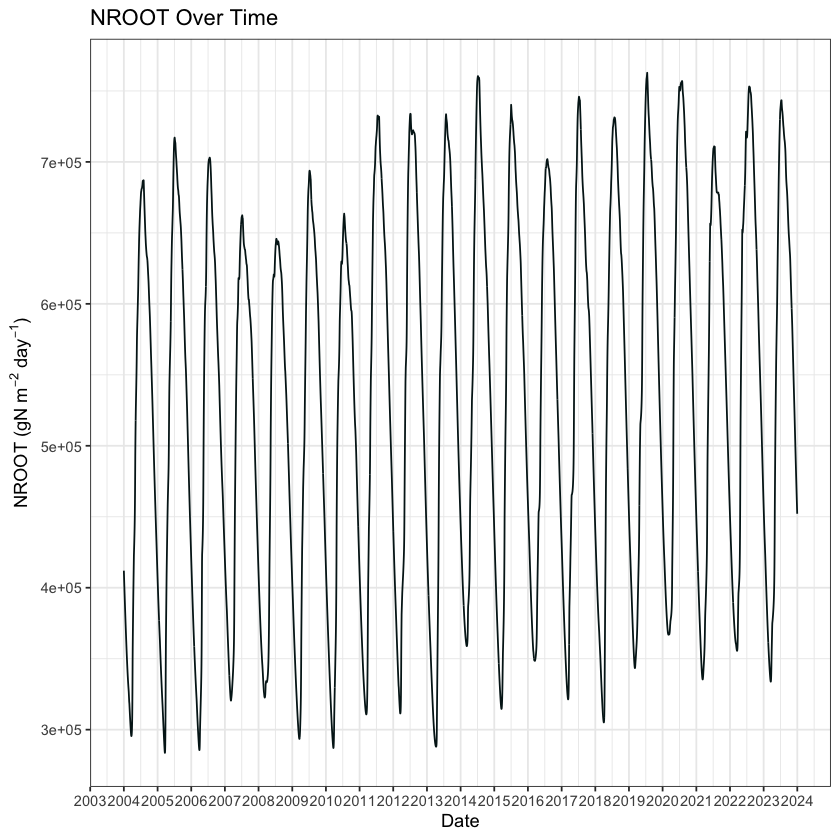

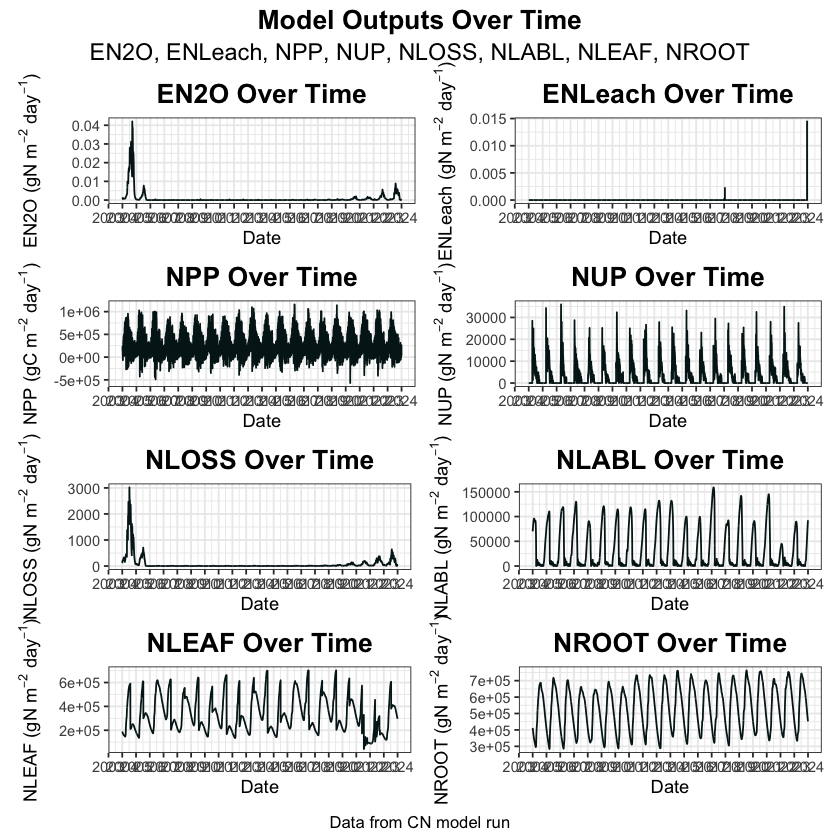

In [9]:
# Plot GPP over time
plot_gpp <- ggplot(output_04_23$data[[1]], aes(x = date, y = gpp)) +
    geom_line(color = "#03191b") +
    labs(title = "GPP Over Time",
             x = "Date",
             y = expression(paste("GPP (gC m"^-2, " day"^-1, ")"))) +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme_bw() +
    theme(panel.grid.major.y = element_line())

# Save the GPP plot
ggsave("../output/gpp_plot.png", plot_gpp, width = 14, height = 4, dpi = 300, bg = "white")
plot_gpp

# Plot NPP over time
plot_npp <- ggplot(output_04_23$data[[1]], aes(x = date, y = npp)) +
    geom_line(color = "#03191b") +
    labs(title = "NPP Over Time",
             x = "Date",
             y = expression(paste("NPP (gC m"^-2, " day"^-1, ")"))) +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme_bw() +
    theme(panel.grid.major.y = element_line())

# Save the NPP plot
ggsave("../output/npp_plot.png", plot_npp, width = 14, height = 4, dpi = 300, bg = "white")
plot_npp


# Plot EN2O over time
plot_en2o <- ggplot(output_04_23$data[[1]], aes(x = date, y = en2o)) +
    geom_line(color = "#03191b") +
    labs(title = "EN2O Over Time",
             x = "Date",
             y = expression(paste("EN2O (gN m"^-2, " day"^-1, ")"))) +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme_bw() +
    theme(panel.grid.major.y = element_line())

# Save the EN2O plot
ggsave("../output/en2o_plot.png", plot_en2o, width = 14, height = 4, dpi = 300, bg = "white")
plot_en2o

# Plot ENLeach over time
plot_enleach <- ggplot(output_04_23$data[[1]], aes(x = date, y = enleach)) +
    geom_line(color = "#03191b") +
    labs(title = "ENLeach Over Time",
             x = "Date",
             y = expression(paste("ENLeach (gN m"^-2, " day"^-1, ")"))) +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme_bw() +
    theme(panel.grid.major.y = element_line())

# Save the ENLeach plot
ggsave("../output/enleach_plot.png", plot_enleach, width = 14, height = 4, dpi = 300, bg = "white")
plot_enleach

# Plot NPP over time
plot_npp <- ggplot(output_04_23$data[[1]], aes(x = date, y = npp)) +
    geom_line(color = "#03191b") +
    labs(title = "NPP Over Time",
             x = "Date",
             y = expression(paste("NPP (gC m"^-2, " day"^-1, ")"))) +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme_bw() +
    theme(panel.grid.major.y = element_line())

# Save the NPP plot
ggsave("../output/npp_plot.png", plot_npp, width = 14, height = 4, dpi = 300, bg = "white")
plot_npp

# Plot NUP over time
plot_nup <- ggplot(output_04_23$data[[1]], aes(x = date, y = nup)) +
    geom_line(color = "#03191b") +
    labs(title = "NUP Over Time",
             x = "Date",
             y = expression(paste("NUP (gN m"^-2, " day"^-1, ")"))) +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme_bw() +
    theme(panel.grid.major.y = element_line())

# Save the NUP plot
ggsave("../output/nup_plot.png", plot_nup, width = 14, height = 4, dpi = 300, bg = "white")
plot_nup

# Plot NLOSS over time
plot_nloss <- ggplot(output_04_23$data[[1]], aes(x = date, y = nloss)) +
    geom_line(color = "#03191b") +
    labs(title = "NLOSS Over Time",
             x = "Date",
             y = expression(paste("NLOSS (gN m"^-2, " day"^-1, ")"))) +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme_bw() +
    theme(panel.grid.major.y = element_line())

# Save the NLOSS plot
ggsave("../output/nloss_plot.png", plot_nloss, width = 14, height = 4, dpi = 300, bg = "white")
plot_nloss

# Plot NLABL over time
plot_nlabl <- ggplot(output_04_23$data[[1]], aes(x = date, y = nlabl)) +
    geom_line(color = "#03191b") +
    labs(title = "NLABL Over Time",
             x = "Date",
             y = expression(paste("NLABL (gN m"^-2, " day"^-1, ")"))) +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme_bw() +
    theme(panel.grid.major.y = element_line())

# Save the NLABL plot
ggsave("../output/nlabl_plot.png", plot_nlabl, width = 14, height = 4, dpi = 300, bg = "white")
plot_nlabl

# Plot NLEAF over time
plot_nleaf <- ggplot(output_04_23$data[[1]], aes(x = date, y = nleaf)) +
    geom_line(color = "#03191b") +
    labs(title = "NLEAF Over Time",
             x = "Date",
             y = expression(paste("NLEAF (gN m"^-2, " day"^-1, ")"))) +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme_bw() +
    theme(panel.grid.major.y = element_line())

# Save the NLEAF plot
ggsave("../output/nleaf_plot.png", plot_nleaf, width = 14, height = 4, dpi = 300, bg = "white")
plot_nleaf

# Plot NROOT over time
plot_nroot <- ggplot(output_04_23$data[[1]], aes(x = date, y = nroot)) +
    geom_line(color = "#03191b") +
    labs(title = "NROOT Over Time",
             x = "Date",
             y = expression(paste("NROOT (gN m"^-2, " day"^-1, ")"))) +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme_bw() +
    theme(panel.grid.major.y = element_line())

# Save the NROOT plot
ggsave("../output/nroot_plot.png", plot_nroot, width = 14, height = 4, dpi = 300, bg = "white")
plot_nroot

# Combine all plots into a single figure
combined_plot <- (plot_en2o + plot_enleach + plot_npp + plot_nup) /
                                 (plot_nloss + plot_nlabl + plot_nleaf + plot_nroot) +
                                 plot_layout(ncol = 1) +
                                 plot_annotation(title = "Model Outputs Over Time",
                                                                subtitle = "EN2O, ENLeach, NPP, NUP, NLOSS, NLABL, NLEAF, NROOT",
                                                                caption = "Data from CN model run") &
                                 theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
                                             plot.subtitle = element_text(hjust = 0.5, size = 14),
                                             plot.caption = element_text(hjust = 0.5, size = 10))

# Save the combined plot
ggsave("../output/combined_model_outputs.png", combined_plot, width = 16, height = 12, dpi = 300, bg = "white")
combined_plot

# plot fabio's data

In [10]:
# read fabio data
library(readxl)
flux_meteo <- read_excel("../data/fabio_2004_2023/flux_meteo.xlsx", 
     col_types = c("date", "numeric", "numeric", 
         "numeric", "text", "text", "text", 
         "text", "numeric", "text", "text", 
         "text", "text", "numeric", "text", 
        "text", "text", "text", "text", "text", 
        "text", "text", "text", "text", "text", 
        "text", "text", "text", "text", "text", 
        "text", "text", "text", "text", "text", 
        "text", "text", "text"))
# remove first row
flux_meteo <- flux_meteo[-1, ]
# check the data
head(flux_meteo)
# select specific columns
flux_meteo <- flux_meteo %>%
  select(date,
        flux_nee_qcf_f_mds,
        flux_n2o_qcf,
        flux_ch4_qcf,
        gpp_u50_f_reddyproc)
# rename columns
colnames(flux_meteo) <- c("date", "nee", "n2o", "ch4", "gpp")
# convert date column to Date type
flux_meteo$date <- as.Date(flux_meteo$date, format = "%Y-%m-%d")
# check the data
head(flux_meteo)

Warning message:
"Expecting date in A2 / R2C1: got 'mm-dd-yyyy'"
Warning message:
"Expecting numeric in B2 / R2C2: got 'umol CO2 m-2 s-1'"
Warning message:
"Expecting numeric in C2 / R2C3: got 'nmol N2O m-2 s-1'"
Warning message:
"Expecting numeric in D2 / R2C4: got 'nmol N2O m-2 s-1'"
Warning message:
"Expecting numeric in I2 / R2C9: got 'umol CO2 m-2 s-1'"
New names:
* `ppfd_dif` -> `ppfd_dif...11`
* `ppfd_dif` -> `ppfd_dif...12`
* `P_ERA` -> `P_ERA...32`
* `P_ERA` -> `P_ERA...33`


date,flux_nee_qcf_f_mds,flux_n2o_qcf,flux_n2o_qcf0,flux_n2o_qcf_f-rf,flux_ch4_qcf,flux_ch4_qcf0,flux_ch4_qcf_f-rf,gpp_u50_f_reddyproc,pa,...,wfps_0.15,wfps_0.3,wfps_0.5,P_ERA...32,P_ERA...33,cloud_cover,ccov_ERA5,tmin,tmax,tmean
<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2021-01-01,0.9360815,NA,NA,NA,NA,NA,NA,0.6533082,95258.175900000002,...,81.372253650000005,82.380677689999999,76.414358780000001,5.0369999999999999,5.8298611111111113E-5,1,100,-0.34699999999999998,2.0249999999999999,0.71458333333333302
2021-01-02,1.3703803,NA,NA,NA,NA,NA,NA,0.2840856,95411.575760000007,...,81.287651969999999,82.710891619999998,76.550551709999993,0.98,1.1342592592592593E-5,1,100,0.68799999999999994,1.907,1.376125
2021-01-03,0.8637366,NA,NA,NA,NA,NA,NA,0.6143411,95497.119420000003,...,69.638811360000005,76.857034299999995,76.671957890000002,1.2969999999999999,1.5011574074074072E-5,1,100,-2.0880000000000001,0.88500000000000001,-0.147145833333333
2021-01-04,0.6757185,NA,NA,NA,NA,NA,NA,0.7801266,95535.177849999993,...,66.219201179999999,64.413349220000001,77.03003966,2.3E-2,2.6620370370370367E-7,0.99399149417877197,99.399149417877197,-2.2389999999999999,0.22600000000000001,-0.66268749999999998
2021-01-05,0.7666215,NA,NA,NA,NA,NA,NA,0.7111028,95579.506259999995,...,66.250472509999994,62.44137147,73.223101580000005,0.11899999999999999,1.3773148148148147E-6,0.99479198455810502,99.479198455810504,-1.145,-0.34499999999999997,-0.71412500000000001
2021-01-06,0.4907299,NA,NA,NA,NA,NA,NA,1.0214699,95783.761240000007,...,65.509238780000004,61.631158319999997,58.874410900000001,0.995,1.1516203703703705E-5,1,100,-1.171,-0.41899999999999998,-0.74583333333333302


date,nee,n2o,ch4,gpp
<date>,<dbl>,<dbl>,<chr>,<dbl>
2021-01-01,0.9360815,NA,NA,0.6533082
2021-01-02,1.3703803,NA,NA,0.2840856
2021-01-03,0.8637366,NA,NA,0.6143411
2021-01-04,0.6757185,NA,NA,0.7801266
2021-01-05,0.7666215,NA,NA,0.7111028
2021-01-06,0.4907299,NA,NA,1.0214699


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


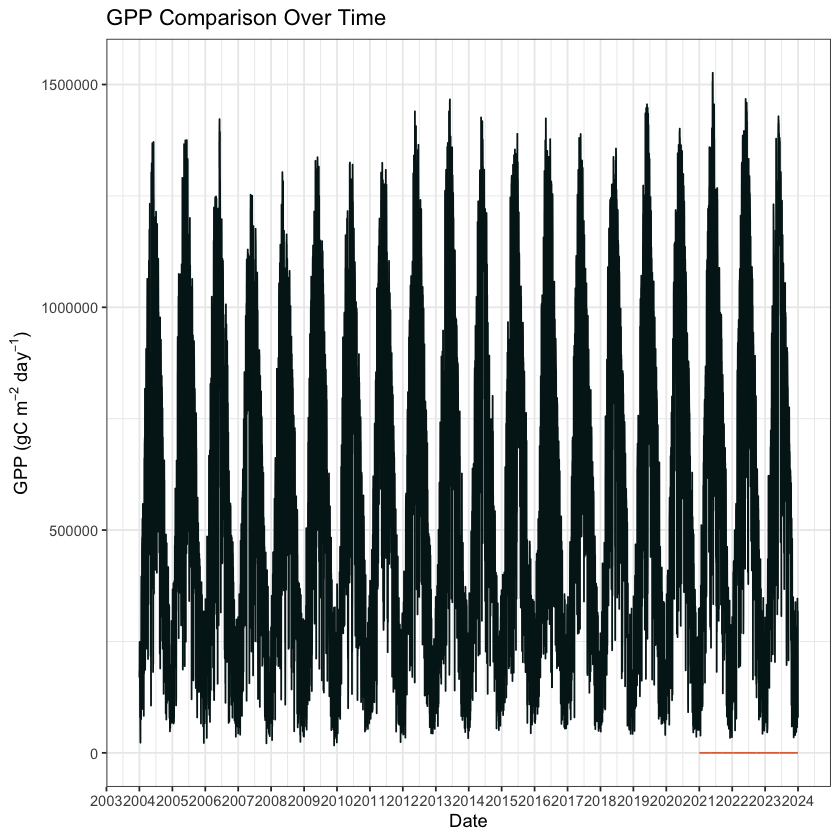

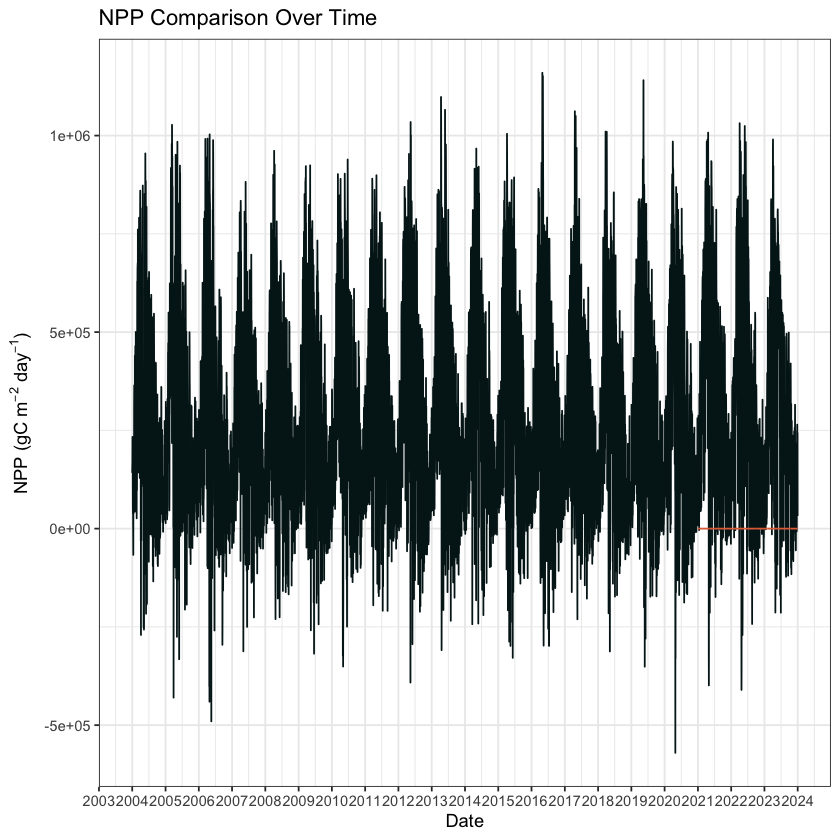

In [11]:
# plot gpp from output_04_23 and fabio data over time in one plot for comparison
plot_gpp_fabio <- ggplot() +
    geom_line(data = output_04_23$data[[1]], aes(x = date, y = gpp), color = "#03191b", size = 0.5) +
    geom_line(data = flux_meteo, aes(x = date, y = gpp), color = "#e26f46", size = 0.5) +
    labs(title = "GPP Comparison Over Time",
             x = "Date",
             y = expression(paste("GPP (gC m"^-2, " day"^-1, ")"))) +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme_bw() +
    theme(panel.grid.major.y = element_line())
# Save the GPP comparison plot
ggsave("../output/gpp_comparison_plot.png", plot_gpp_fabio, width = 14, height = 4, dpi = 300, bg = "white")
plot_gpp_fabio

# Plot NPP from output_04_23 and fabio data over time in one plot for comparison
plot_npp_fabio <- ggplot() +
    geom_line(data = output_04_23$data[[1]], aes(x = date, y = npp), color = "#03191b", size = 0.5) +
    geom_line(data = flux_meteo, aes(x = date, y = nee), color = "#e26f46", size = 0.5) +
    labs(title = "NPP Comparison Over Time",
             x = "Date",
             y = expression(paste("NPP (gC m"^-2, " day"^-1, ")"))) +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme_bw() +
    theme(panel.grid.major.y = element_line())
# Save the NPP comparison plot
ggsave("../output/npp_comparison_plot.png", plot_npp_fabio, width = 14, height = 4, dpi = 300, bg = "white")
plot_npp_fabio

## Plots with CNmodel output vs. validation data

In [12]:
# read the cnmodel validation data
cnmodel_validation <- readRDS("../data/cnmodel_validation.rds")
# check the data
str(cnmodel_validation$data[[1]])

tibble [7,300 x 6] (S3: tbl_df/tbl/data.frame)
 $ date  : Date[1:7300], format: "2004-01-01" "2004-01-02" ...
 $ gpp   : num [1:7300] 0.2188 0.1229 -0.0693 -0.2038 0.0421 ...
 $ le    : num [1:7300] 7.45 6.98 6.39 3.2 1.09 ...
 $ le_qc : num [1:7300] -9999 -9999 -9999 -9999 -9999 ...
 $ nee   : num [1:7300] 0.761 0.788 0.769 0.764 0.754 ...
 $ nee_qc: num [1:7300] 0.25 0.3333 0.9583 0.2083 0.0417 ...


In [13]:
# read the columns of output_04_23
colnames(output_04_23$data[[1]])
head(output_04_23$data[[1]])

[1] "date"     "year_dec" "fapar"    "gpp"      "transp"   "latenth" 
 [7] "pet"      "vcmax"    "jmax"     "vcmax25"  "jmax25"   "gs_accl" 
[13] "wscal"    "chi"      "iwue"     "tsoil"    "lai"      "cleaf"   
[19] "nleaf"    "croot"    "nroot"    "clabl"    "nlabl"    "ninorg"  
[25] "pnh4"     "pno3"     "enleach"  "en2o"     "npp"      "csoil"   
[31] "nsoil"    "clitt"    "nlitt"    "nfix"     "nup"      "cex"     
[37] "netmin"   "dcharv"   "dnharv"   "drd"      "lma"      "narea"   
[43] "narea_v"  "nloss"    "cseed"    "nseed"    "npp_leaf" "npp_root"
[49] "npp_wood" "asat"     "cwood"    "nwood"    "rleaf"    "rwood"   
[55] "rroot"    "rcex"     "rhet"     "cresv"    "nresv"    "rgrow"   
[61] "npp_seed" "dclabl"   "dnlabl"   "dnleaf"   "dnroot"   "dnwood"  
[67] "dnseed"   "nresorb"  "x1"       "x2"       "x3"       "x4"

,date,year_dec,fapar,gpp,transp,latenth,pet,vcmax,jmax,vcmax25,...,dnlabl,dnleaf,dnroot,dnwood,dnseed,nresorb,x1,x2,x3,x4
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2004-01-01,2004.000,1,169019.7,1.792679,10840332,0.02411877,0.2575056,1.0583662,2.094062,...,365.9716,35.48438,37.01213,0,0,1568.146,0.008978339,2282.414,0,1
2,2004-01-02,2004.003,1,185064.7,1.791720,10948121,-0.07806465,0.2532548,1.0426224,2.092788,...,371.7971,38.46875,40.08976,0,0,1560.191,0.009526155,2472.202,0,1
3,2004-01-03,2004.005,1,185802.4,1.745386,11770548,-0.07399429,0.2223786,0.9057468,2.101063,...,377.5200,41.54688,43.33666,0,0,1552.305,0.010073667,2672.427,0,1
4,2004-01-04,2004.008,1,248982.8,1.693172,12044950,-0.13801579,0.2126201,0.8576724,2.134717,...,383.1394,45.37500,47.36010,0,0,1544.447,0.010620877,2920.539,0,1
5,2004-01-05,2004.011,1,175934.4,1.669083,10477977,-0.11987031,0.2478695,1.0263752,2.131394,...,388.6486,48.57812,50.66510,0,0,1536.675,0.011167785,3124.348,0,1
6,2004-01-06,2004.014,1,227954.4,1.626077,10366403,-0.19312412,0.2442609,1.0118411,2.146198,...,394.0553,52.39062,54.65206,0,0,1528.955,0.011714390,3370.210,0,1


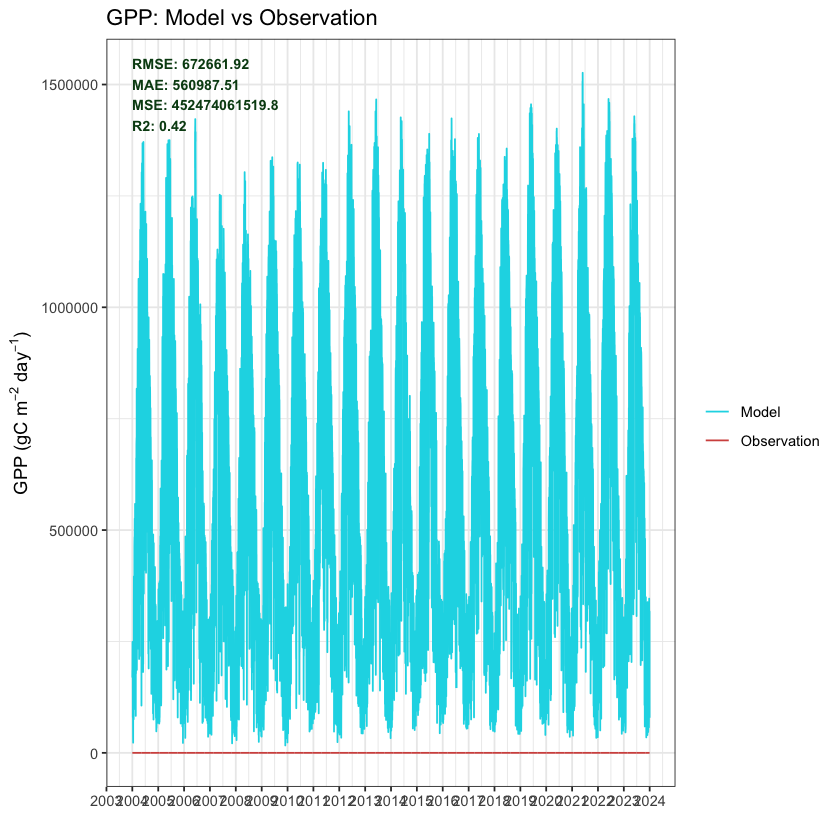

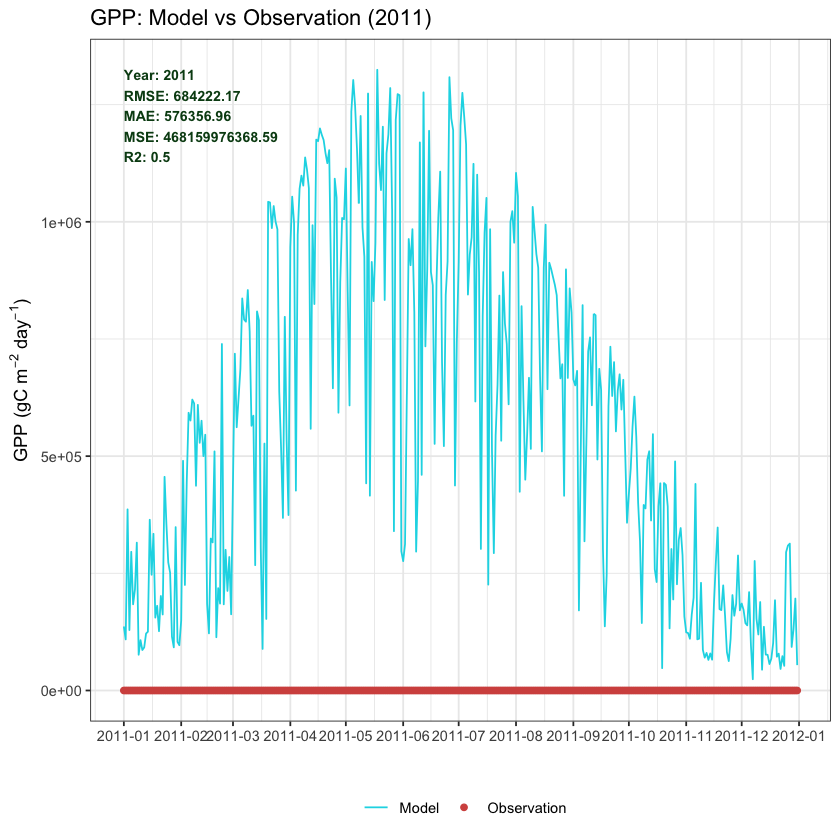

In [14]:
# Define the function to plot model vs observed GPP and calculate metrics
plot_model_output <- function(model_output, obs_data) {
    # Extract dates and GPP from model output
    model_df <- tibble(
        date = model_output$data[[1]]$date,
        gpp = model_output$data[[1]]$gpp,
        type = "Model"
    )
    # Extract dates and GPP from observation data
    obs_df <- tibble(
        date = obs_data$data[[1]]$date,
        gpp = obs_data$data[[1]]$gpp,
        type = "Observation"
    )
    # Combine for plotting
    plot_df <- bind_rows(model_df, obs_df)
    # Wide format for metrics
    wide_df <- left_join(
        model_df %>% select(date, gpp_model = gpp),
        obs_df %>% select(date, gpp_obs = gpp),
        by = "date"
    )
    # Calculate metrics
    rmse <- sqrt(mean((wide_df$gpp_obs - wide_df$gpp_model)^2, na.rm = TRUE))
    mae <- mean(abs(wide_df$gpp_obs - wide_df$gpp_model), na.rm = TRUE)
    mse <- mean((wide_df$gpp_obs - wide_df$gpp_model)^2, na.rm = TRUE)
    r2 <- cor(wide_df$gpp_obs, wide_df$gpp_model, use = "pairwise.complete.obs")^2
    # Save metrics as csv
    metrics_df <- data.frame(RMSE = rmse, MAE = mae, MSE = mse, R2 = r2)
    write.csv(metrics_df, file = "../output/02_model_vs_observation_metrics.csv", row.names = FALSE)
    # Annotate metrics
    metrics_text <- paste0(
        "RMSE: ", round(rmse, 2), "\n",
        "MAE: ", round(mae, 2), "\n",
        "MSE: ", round(mse, 2), "\n",
        "R2: ", round(r2, 2)
    )
    # Plot
    ggplot(plot_df, aes(x = date, y = gpp, color = type)) +
        geom_line() +
        labs(title = "GPP: Model vs Observation",
                 x = "",
                 y = expression(paste("GPP (gC m"^-2, " day"^-1, ")")),
                 color = "") +
        scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
        scale_color_manual(values = c("Model" = "#0ed8e6", "Observation" = "#d4544e")) +
        annotate("text", x = min(plot_df$date, na.rm = TRUE), y = max(plot_df$gpp, na.rm = TRUE),
                         label = metrics_text, hjust = 0, vjust = 0.8, 
                         size = 3, 
                         fontface = "bold", color = "#054915") +
        theme_bw()
}

# Plot the model output
plot <- plot_model_output(output_04_23, cnmodel_validation)
plot

# Save the plot
ggsave("../output/02_model_vs_observation_plot.png", plot, width = 14, height = 4, dpi = 300, bg = "white")

#################################------------------#################################
# plot the model output on yearly basis
#################################----------------#################################

# GPP plot for a selected year with metrics

# Define the year to plot (change this variable to select a different year)
selected_year <- 2011

# Filter data for the selected year
df_gpp_plot <- tibble(
    date = output_04_23$data[[1]]$date,
    gpp_mod = output_04_23$data[[1]]$gpp
) %>%
    left_join(
        tibble(
            date = cnmodel_validation$data[[1]]$date,
            gpp_obs = cnmodel_validation$data[[1]]$gpp
        ),
        by = "date"
    ) %>%
    filter(lubridate::year(date) == selected_year)

# Calculate metrics for the selected year
rmse_year <- sqrt(mean((df_gpp_plot$gpp_obs - df_gpp_plot$gpp_mod)^2, na.rm = TRUE))
mae_year <- mean(abs(df_gpp_plot$gpp_obs - df_gpp_plot$gpp_mod), na.rm = TRUE)
mse_year <- mean((df_gpp_plot$gpp_obs - df_gpp_plot$gpp_mod)^2, na.rm = TRUE)
r2_year <- cor(df_gpp_plot$gpp_obs, df_gpp_plot$gpp_mod, use = "pairwise.complete.obs")^2

# Annotate metrics
metrics_text_year <- paste0(
    "Year: ", selected_year, "\n",
    "RMSE: ", round(rmse_year, 2), "\n",
    "MAE: ", round(mae_year, 2), "\n",
    "MSE: ", round(mse_year, 2), "\n",
    "R2: ", round(r2_year, 2)
)

# Plot GPP for the selected year
plot_gpp_year <- ggplot(df_gpp_plot, aes(x = date)) +
    geom_point(aes(y = gpp_obs, color = "Observation")) +
    geom_line(aes(y = gpp_mod, color = "Model")) +
    labs(
        title = paste("GPP: Model vs Observation (", selected_year, ")", sep = ""),
        x = "",
        y = expression(paste("GPP (gC m"^-2, " day"^-1, ")")),
        color = ""
    ) +
    scale_x_date(date_labels = "%Y-%m", date_breaks = "1 month") +
    scale_color_manual(values = c("Model" = "#0ed8e6", "Observation" = "#d4544e")) +
    annotate("text", x = min(df_gpp_plot$date, na.rm = TRUE), y = max(df_gpp_plot$gpp_mod, na.rm = TRUE),
                     label = metrics_text_year, hjust = 0, vjust = 1, size = 3, color = "#054915", fontface = "bold") +
    theme_bw() +
    theme(
        panel.grid.major.y = element_line(),
        legend.position = "bottom"
    )

plot_gpp_year

# Optionally, save metrics for the selected year
metrics_year_df <- data.frame(
    Year = selected_year,
    RMSE = rmse_year,
    MAE = mae_year,
    MSE = mse_year,
    R2 = r2_year
)
write.csv(metrics_year_df, file = paste0("../output/03_model_vs_observation_metrics_", selected_year, ".csv"), row.names = FALSE)

# Save the plot
ggsave("../output/03_model_vs_observation_plot_first_year.png", plot_gpp_year, width = 12, height = 5, dpi = 300, bg = "white")

---
# CN Model Calibration

In [15]:
# create output names directory if it does not exist
if (!dir.exists("../output/01_calibration")) {
    dir.create("../output/01_calibration", recursive = TRUE)
}

In [17]:
# print CN model validation data
print(cnmodel_validation$data[[1]])

# A tibble: 7,300 x 6
   date           gpp    le le_qc   nee nee_qc
   <date>       <dbl> <dbl> <dbl> <dbl>  <dbl>
 1 2004-01-01  0.219   7.45 -9999 0.761 0.25  
 2 2004-01-02  0.123   6.98 -9999 0.788 0.333 
 3 2004-01-03 -0.0693  6.39 -9999 0.769 0.958 
 4 2004-01-04 -0.204   3.20 -9999 0.764 0.208 
 5 2004-01-05  0.0421  1.09 -9999 0.754 0.0417
 6 2004-01-06 -0.521   1.45 -9999 1.32  0.0208
 7 2004-01-07 -0.369   5.42 -9999 1.29  0.604 
 8 2004-01-08 -0.947   9.58 -9999 1.75  0.979 
 9 2004-01-09 -0.285  -2.11 -9999 1.87  0.979 
10 2004-01-10 -0.294  14.9  -9999 2.11  1     
# i 7,290 more rows


In [27]:
# Define calibration settings and parameter ranges from previous work
settings_rmse <- list(
  method = 'GenSA',                   # minimizes the RMSE
  metric = cost_rmse_pmodel,          # our cost function
  control = list(                     # control parameters for optimizer GenSA
    maxit = 1000
    ),                     
  par = list(                         # bounds for the parameter space
    kphio = list(lower=0.02, upper=0.2, init=0.05),
    kphio_par_a = list(lower = -0.5, upper = 0.5, init = -0.1),
    kphio_par_b = list(lower = 10, upper = 40, init =25),
    # err_gpp = list(lower = 0.1, upper = 4, init = 0.8), # can not use in the GenSA
    rd_to_vcmax = list(lower = 0.01, upper = 0.5, init = 0.001)
  )
)
#########################-------------###############################
# Define the parameter ranges for the calibration
par_fixed = list(         # fix all other parameters
    # kphio_par_a        = 0.0,        # set to zero to disable temperature-dependence 
    # kphio_par_b        = 1.0,
    soilm_thetastar    = 0.6 * 240,  # to recover paper setup with soil moisture stress
    soilm_betao        = 0.0,
    beta_unitcostratio = 146.0,
    # rd_to_vcmax        = 0.014,      # value from Atkin et al. 2015 for C3 herbaceous
    tau_acclim         = 30.0,
    kc_jmax            = 0.41
  )

In [28]:
# Calibrate the model and optimize the free parameters using
# demo datasets
pars_calib_rmse <- calib_sofun(
  # calib_sofun arguments:
  drivers = drivers,  
  obs = cnmodel_validation,
  settings = settings_rmse,
  # extra arguments passed to the cost function:
  par_fixed = par_fixed, # fixed parameters
  targets = "gpp"           # define target variable GPP
)

In [29]:
# Print the parameter values before calibration
cat("Parameters before calibration:\n")
for (param_name in names(pars_calib_rmse$par)) {
    cat(param_name, ":", pars[[param_name]], "\n")
}

# Replace the parameters with the calibrated values
for (param_name in names(pars_calib_rmse$par)) {
    pars[[param_name]] <- pars_calib_rmse$par[[param_name]]
}

# Print the parameter values after calibration
cat("\nParameters after calibration:\n")
for (param_name in names(pars_calib_rmse$par)) {
    cat(param_name, ":", pars[[param_name]], "\n")
}

Parameters before calibration:
kphio : 0.1494628 
kphio_par_a : -0.2217127 
kphio_par_b : 32.8692 
rd_to_vcmax : 0.235775 

Parameters after calibration:
kphio : 0.1494628 
kphio_par_a : -0.2217127 
kphio_par_b : 32.8692 
rd_to_vcmax : 0.235775 


In [30]:
# run the model with calibrated parameters
output_gensa_1_params <- runread_cnmodel_f(
  drivers = drivers,
  par = pars
)
# Save the calibrated model output
saveRDS(output_gensa_1_params, file = "../output/01_calibration/01_calibration_first/output_gensa_1_params.rds")

Warning message in cor(wide_df$gpp_obs, wide_df$gpp_model, use = "pairwise.complete.obs"):
"Standardabweichung ist Null"


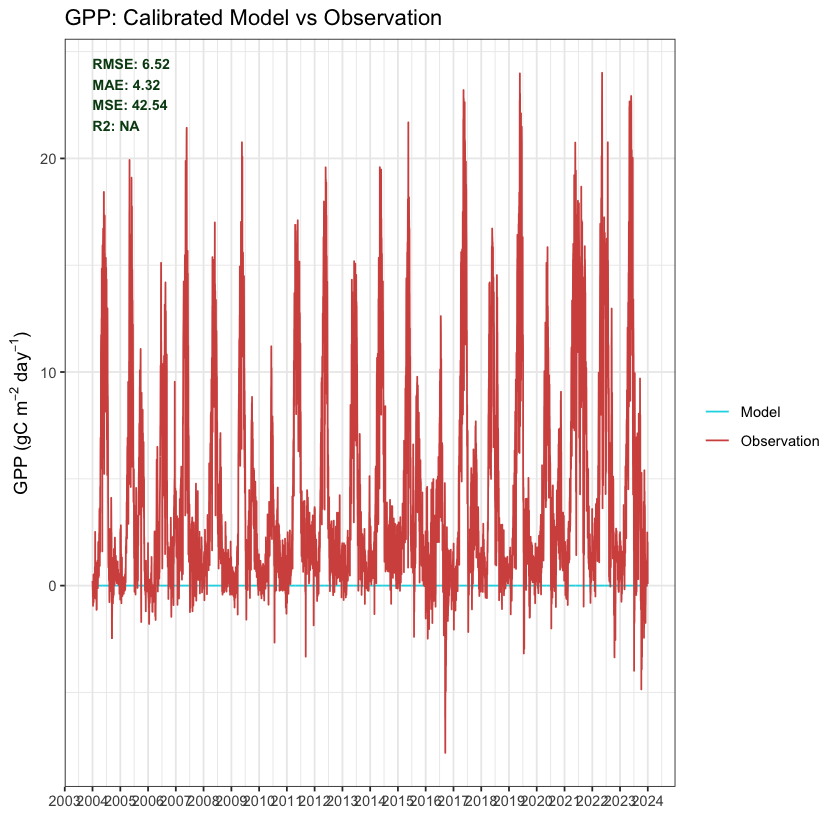

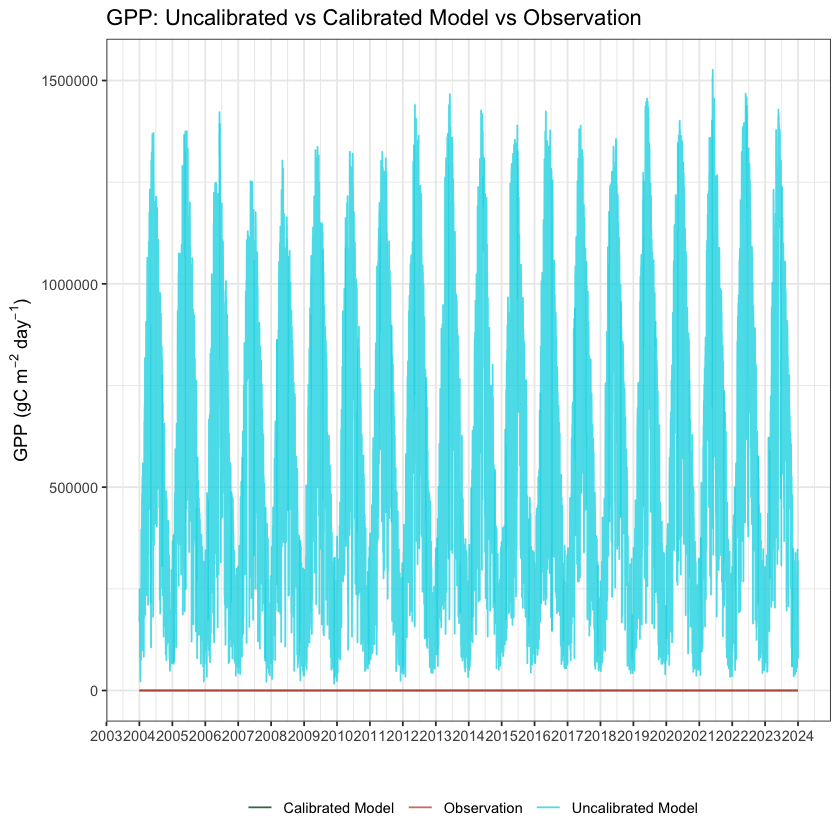

In [31]:
# Plot the calibrated model output
plot_calibrated <- plot_model_output(output_gensa_1_params, cnmodel_validation)

# Add title to distinguish from uncalibrated plot
plot_calibrated <- plot_calibrated + 
    labs(title = "GPP: Calibrated Model vs Observation") +
    theme_bw()

plot_calibrated

# Save the calibrated model plot
ggsave("../output/01_calibration/01_calibration_first/calibrated_model_vs_observation.png", 
       plot_calibrated, width = 14, height = 4, dpi = 300, bg = "white")

# Create comparison plot between uncalibrated and calibrated models
comparison_df <- tibble(
    date = cnmodel_validation$data[[1]]$date,
    gpp_obs = cnmodel_validation$data[[1]]$gpp,
    gpp_uncalibrated = output_04_23$data[[1]]$gpp,
    gpp_calibrated = output_gensa_1_params$data[[1]]$gpp
) %>%
    pivot_longer(cols = starts_with("gpp_"), names_to = "type", values_to = "gpp") %>%
    mutate(type = case_when(
        type == "gpp_obs" ~ "Observation",
        type == "gpp_uncalibrated" ~ "Uncalibrated Model",
        type == "gpp_calibrated" ~ "Calibrated Model"
    ))

# Plot comparison
plot_comparison <- ggplot(comparison_df, aes(x = date, y = gpp, color = type)) +
    geom_line(alpha = 0.8) +
    labs(title = "GPP: Uncalibrated vs Calibrated Model vs Observation",
         x = "",
         y = expression(paste("GPP (gC m"^-2, " day"^-1, ")")),
         color = "") +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    scale_color_manual(values = c("Observation" = "#d4544e", 
                                  "Uncalibrated Model" = "#0ed8e6", 
                                  "Calibrated Model" = "#054915")) +
    theme_bw() +
    theme(legend.position = "bottom")

plot_comparison

# Save the comparison plot
ggsave("../output/01_calibration/01_calibration_first/model_comparison_plot.png", 
       plot_comparison, width = 14, height = 4, dpi = 300, bg = "white")